## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





Frequenza percentuale di volte che è uscita testa:
 [np.float64(50.27027027027027), np.float64(49.73954763536669), np.float64(50.30959752321982), np.float64(50.11503067484663), np.float64(49.11832353692819), np.float64(49.92099384296845), np.float64(50.72371762315896), np.float64(49.670619235836625), np.float64(49.64006739163731), np.float64(49.70878869183954), np.float64(50.21385291671617), np.float64(51.93596425912137), np.float64(49.40808195788276), np.float64(49.46689809075131), np.float64(50.62522329403358), np.float64(49.916666666666664), np.float64(50.29640506879861), np.float64(49.063842848373234), np.float64(50.77044646384829), np.float64(49.71240755957272), np.float64(49.80061349693251), np.float64(49.661434287473064), np.float64(58.333333333333336), np.float64(49.84496124031008), np.float64(48.98381404405501), np.float64(50.96373734073833), np.float64(49.71041610977457), np.float64(49.01453957996769), np.float64(50.44910179640718), np.float64(49.24063449206885), np.float64(5

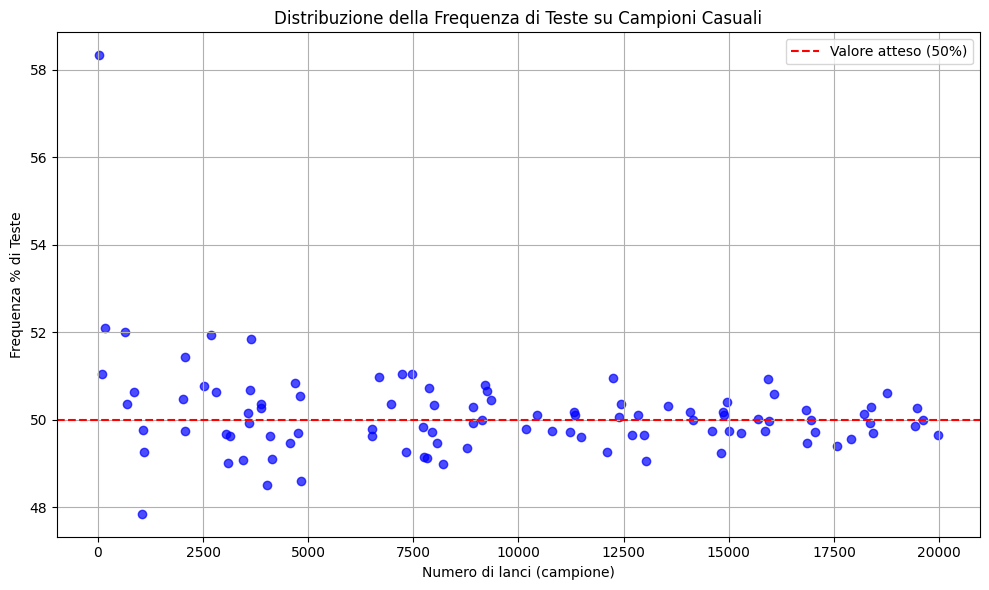

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa
def lancio_moneta(N):
    lanci = np.random.binomial(n=1, p=0.5, size=N)
    testa = N - np.sum(lanci)
    freq_t = testa/N * 100
    return freq_t

# frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000
n_lanci = np.random.randint(10, 20001, size=100)
frequenza_t = [lancio_moneta(i) for i in n_lanci]
print("Frequenza percentuale di volte che è uscita testa:\n",frequenza_t)

# plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)
plt.figure(figsize=(10, 6))
plt.scatter(n_lanci, frequenza_t, color='blue', alpha=0.7)
plt.axhline(50, color='red', linestyle='--', label='Valore atteso (50%)')
plt.xlabel("Numero di lanci (campione)")
plt.ylabel("Frequenza % di Teste")
plt.title("Distribuzione della Frequenza di Teste su Campioni Casuali")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [163]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dimensioni del dataset: (891, 12)
Valori mancanti:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Righe duplicate:  0
Età media per classe:
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


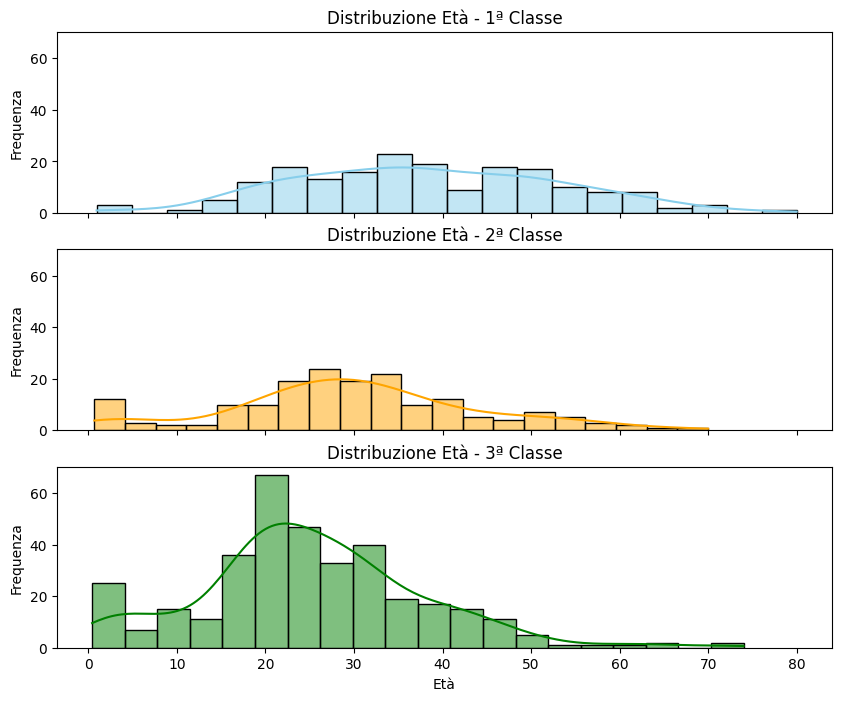

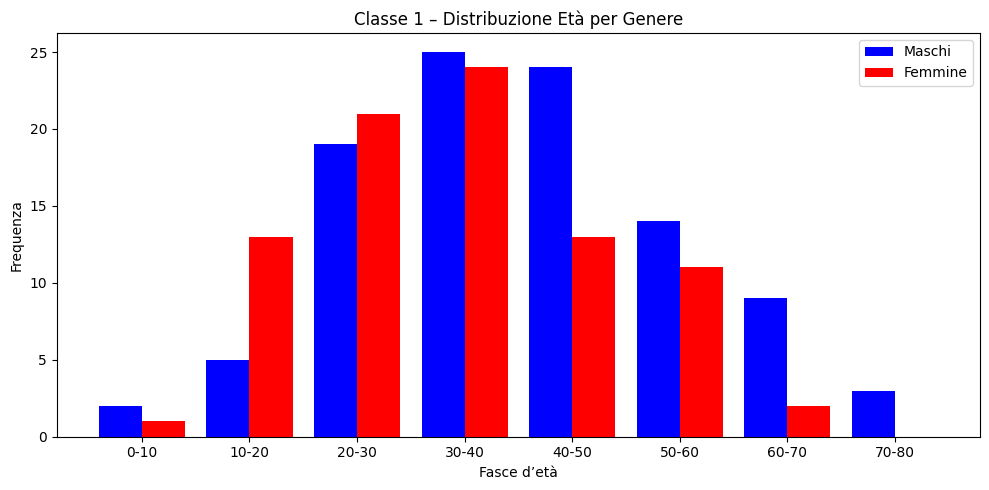

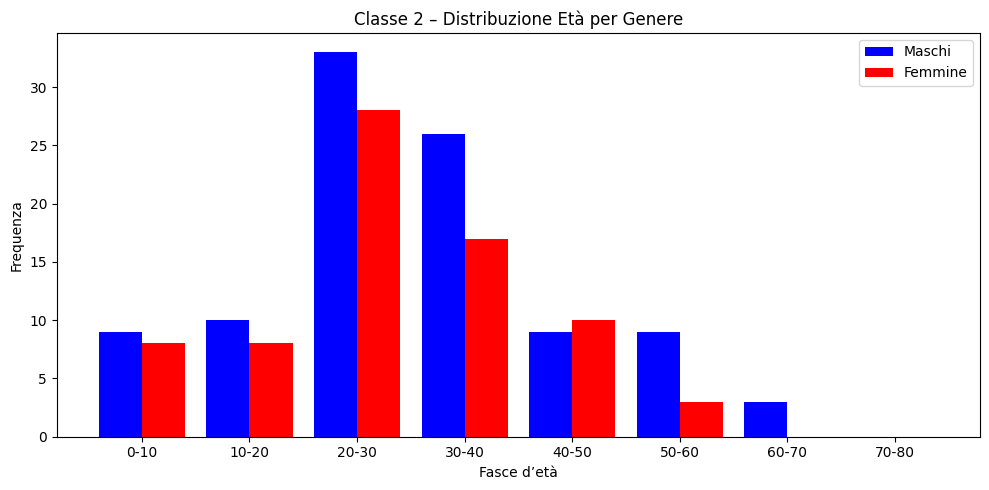

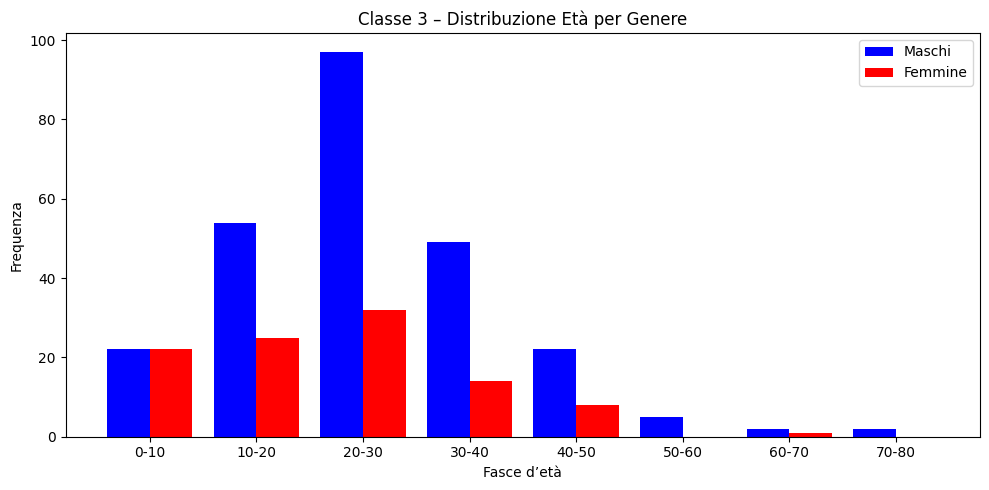

In [164]:
print("Dimensioni del dataset:", df.shape)  # (righe, colonne)

print("Valori mancanti:")
print(df.isna().sum())

# sostituisco i valori mancanti di 'Embarked', con quello più frequente
Embarked_moda = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(Embarked_moda)

# rimuovo le righe dove 'Age' è mancante
df = df[df['Age'].notna()]

print("\nRighe duplicate: ", df.duplicated().sum())

print("Età media per classe:")
print(df.groupby('Pclass')['Age'].mean())


# Ditribuzione dell'età per classe
# Impostazioni della figura: 3 subplot in verticale con dimensioni personalizzate
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True, sharey=True)

# Primo grafico: Passeggeri di 1ª classe
sns.histplot(data=df[df['Pclass'] == 1], x='Age', ax=ax1, bins=20, kde=True, color='skyblue')
ax1.set_title('Distribuzione Età - 1ª Classe')

# Secondo grafico: Passeggeri di 2ª classe
sns.histplot(data=df[df['Pclass'] == 2], x='Age', ax=ax2, bins=20, kde=True, color='orange')
ax2.set_title('Distribuzione Età - 2ª Classe')

# Terzo grafico: Passeggeri di 3ª classe
sns.histplot(data=df[df['Pclass'] == 3], x='Age', ax=ax3, bins=20, kde=True, color='green')
ax3.set_title('Distribuzione Età - 3ª Classe')

# Etichetta asse x
ax3.set_xlabel('Età')
ax1.set_ylabel('Frequenza')
ax2.set_ylabel('Frequenza')
ax3.set_ylabel('Frequenza')

plt.show()


# Distribuzione maschi/femmine
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Ciclo sulle tre classi
for pclass in [1, 2, 3]:
    # Filtro per classe
    df_class = df[df['Pclass'] == pclass]

    # Raggruppamento per fascia d'età e sesso
    grouped = df_class.groupby(['AgeGroup', 'Sex'], observed=False).size().unstack(fill_value=0)


    # Estrai frequenze per maschi e femmine
    freq_m = grouped.get('male', pd.Series([0]*len(labels), index=labels))
    freq_f = grouped.get('female', pd.Series([0]*len(labels), index=labels))

    # Coordinate X e larghezza barre
    x = np.arange(len(labels))
    bar_width = 0.4

    # Crea il grafico
    plt.figure(figsize=(10, 5))
    plt.bar(x - bar_width/2, freq_m, width=bar_width, label='Maschi', color='blue')
    plt.bar(x + bar_width/2, freq_f, width=bar_width, label='Femmine', color='red')
    plt.title(f'Classe {pclass} – Distribuzione Età per Genere')
    plt.xlabel('Fasce d’età')
    plt.ylabel('Frequenza')
    plt.xticks(x, labels)
    plt.legend()
    plt.tight_layout()
    plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Distribuzione delle specie:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Statistiche dei petali per specie:
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


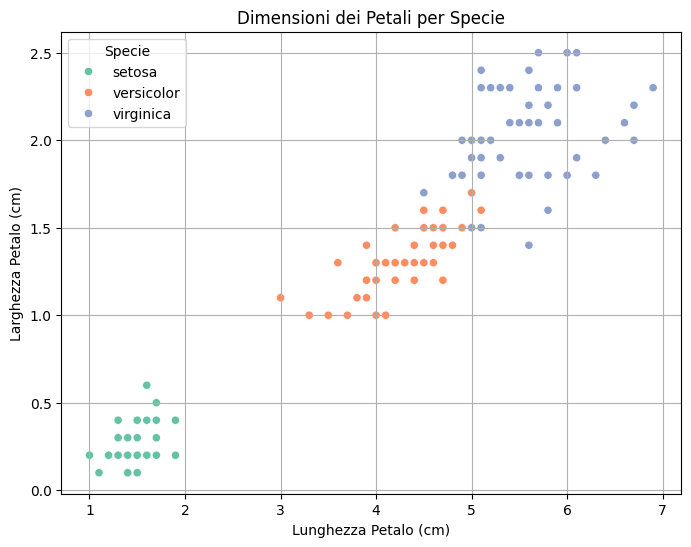

Colonna dell'area dei petali:
  species  petal_area
0  setosa        0.28
1  setosa        0.28
2  setosa        0.26
3  setosa        0.30
4  setosa        0.28
Media dell'area:
species
setosa         0.3656
versicolor     5.7204
virginica     11.2962
Name: petal_area, dtype: float64


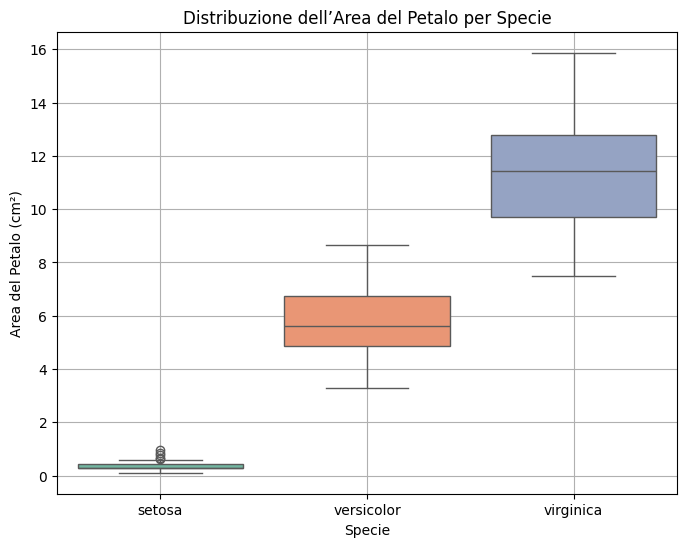

In [167]:
# Distribuzione delle specie
print("Distribuzione delle specie:")
print(df['species'].value_counts())

# Lunghezza e la larghezza media dei petali per specie
print("\nStatistiche dei petali per specie:")
print(df.groupby('species')[['petal_length', 'petal_width']].mean())

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', palette='Set2')
plt.title('Dimensioni dei Petali per Specie')
plt.xlabel('Lunghezza Petalo (cm)')
plt.ylabel('Larghezza Petalo (cm)')
plt.legend(title='Specie')
plt.grid(True)
plt.show()

# Nuova colonna per l'area del petalo
df['petal_area'] = df['petal_length'] * df['petal_width']
print("Colonna dell'area dei petali:")
print(df[['species', 'petal_area']].head())
print("Media dell'area:")
print(df.groupby('species')['petal_area'].mean())

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='species', y='petal_area', hue='species', palette='Set2', legend=False)
plt.title('Distribuzione dell’Area del Petalo per Specie')
plt.xlabel('Specie')
plt.ylabel('Area del Petalo (cm²)')
plt.grid(True)
plt.show()
